# Introduction (5 Points): Summarize the problem + explain the steps you plan to take to address the problem

This data set is comprised nearly 10,000 observations of 1 response/dependent variable (net hourly electrical 
energy output) and 4 explanatory/independent variables (temperature, ambient pressure, relative humidity, 
and exhaust vacuum).We are going to find which 2 combined factors among these 4 variables can be better used to predict the response variable, the hourly electrical energy output.I will use all the shortage for these 5 variables in the following work.

Steps are as follows:
1)Load data,read data in Jupter Notebook, do some basic cleaning for the data; 
2)Perform some basic exploratory data analysis (EDA) to  identify some preliminary predictive inferences; Selecting appropriate statistical metrics to be calculated;
3)Construct at least two different linear regression models that predict net hourly electrical energy output based on the provided explanatory variables and evaluate them using K-fold cross validation;
4)Make conclusions;

# Step1

In [5]:
# load the pandas library
import pandas as pd

# load the train_test_split function from the sklearn.model_selection module
from sklearn.model_selection import train_test_split

# start by reading a set of sample data from github. This data set contains information related to flights
# departing from the two major airports in Houston, Texas
filename = "https://raw.githubusercontent.com/YALINYAN-YU/DAV6150/master/M2_Data.csv"
df = pd.read_csv(filename)
df.head()

,T,V,AP,RH,EP
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [6]:
#check the data type
df.dtypes


T     float64
V     float64
AP    float64
RH    float64
EP    float64
dtype: object

In [8]:
#finding the null values
print(df.isnull().sum())

T     0
V     0
AP    0
RH    0
EP    0
dtype: int64


In [19]:
# Plotting a Histogram
# Importing required libraries.
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)

# Plotting a scatter plot
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df[‘T’], df[‘EP’])
ax.set_xlabel(‘T’)
ax.set_ylabel(‘EP’)
plt.show()

SyntaxError: invalid character in identifier (<ipython-input-19-dbfa52985c55>, line 12)

# Step2

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
% matplotlib inline


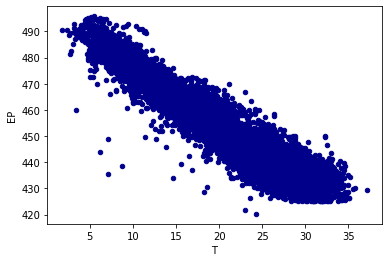

In [74]:
#Use the scat plot to predict is there a correlation between the T and EP. 
#The plot shows there is a negetive correlation between the T and EP, very strong.
ax1 = df.plot.scatter(x='T',
                      y='EP',
                      c='DarkBlue')

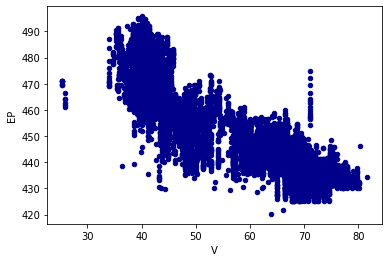

In [22]:
#Use the scat plot to predict is there a correlation between the T and EP. 
#The plot shows there is a negetive correlation between the V and EP.
In this EDA, there seems like 
ax1 = df.plot.scatter(x='V',
                      y='EP',
                      c='DarkBlue')

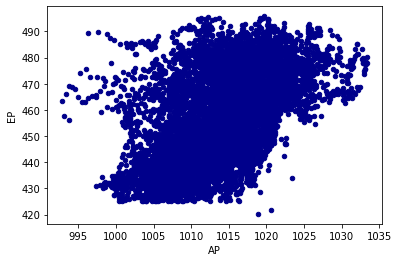

In [23]:
#Use the scat plot to predict is there a correlation between the T and EP. 
#The plot shows there is a positive correlation between the AP and EP, but not very strong.
ax1 = df.plot.scatter(x='AP',
                      y='EP',
                      c='DarkBlue')

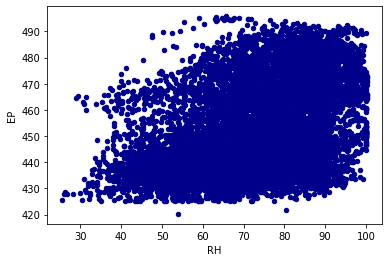

In [75]:
#Use the scat plot to predict is there a correlation between the RH and EP. 
#The plot shows there is a positive correlation between the RH and EP, but not very strong.
ax1 = df.plot.scatter(x='RH',
                      y='EP',
                      c='DarkBlue')

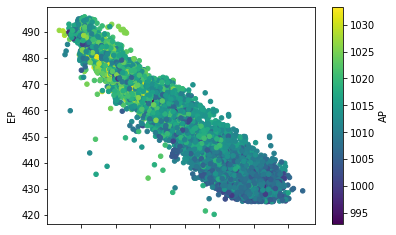

In [29]:
# see the 2 varaibles T and AP to affect the EP in one plot.
ax2 = df.plot.scatter(x='T',
                      y='EP',
                      c='AP',
                      colormap='viridis')

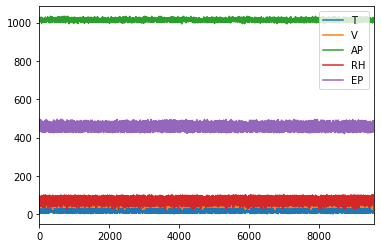

In [34]:
#to present the 
lines = df.plot.line()

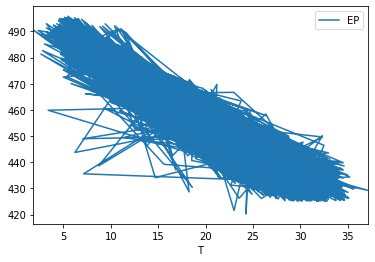

In [33]:
lines = df.plot.line(x='T', y='EP')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018E72047AC8>]],
      dtype=object)

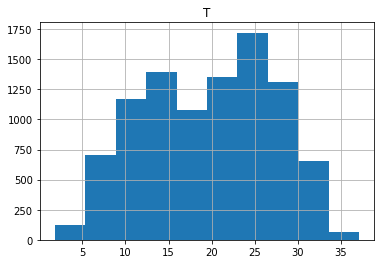

In [26]:
# use histgram to see the distribution of different variables.
df.hist(column='T')


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018E71BC8D30>]],
      dtype=object)

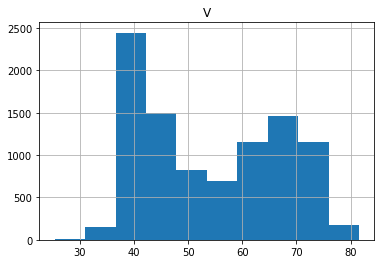

In [17]:

df.hist(column='V')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018E71C76048>]],
      dtype=object)

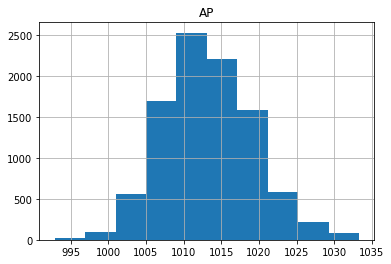

In [15]:
df.hist(column='AP')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018E71D5C208>]],
      dtype=object)

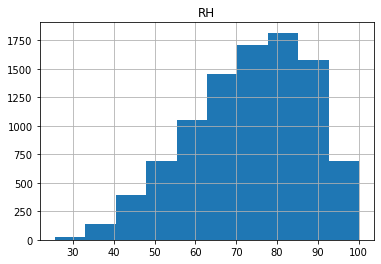

In [16]:
df.hist(column='RH')

Small Conclusion: Varaible AP follow the normal distribution, T AND RH is almost normal distribution and right-skewed, V is not normal distribution.  

# Step3

In [35]:
# I want to preserve the original dataframe in its entirety, make a copy of the original dataframe so that the original is preserved
X = df.copy()

In [36]:
# now drop the ArrDelay column from 'X' so that the response variable is removed from the explanatory variables
X.drop('EP', axis=1, inplace=True)

In [37]:
# The ArrDelay column has been removed from the data set
X.head()

,T,V,AP,RH
0,14.96,41.76,1024.07,73.17
1,25.18,62.96,1020.04,59.08
2,5.11,39.40,1012.16,92.14
3,20.86,57.32,1010.24,76.64
4,10.82,37.50,1009.23,96.62


In [39]:
# move the response variable (in this case "ArrDelay") to a separate variable
y = df.EP

In [42]:
# check results
y.head()

0    463.26
1    444.37
2    488.56
3    446.48
4    473.90
Name: EP, dtype: float64

In [43]:
# Now split the data into training and testing subsets. 
# We'll set aside 30% of the data for testing purposes; Remember to make sure you specify a value for the inital random_state
# if you want to have the ability to reproduce the exact same training + testing subsets repeatedly
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

In [44]:
# Let's check the results
len(X_train)

6697

In [45]:
len(X_test)

2871

In [46]:
# Let's check the row indices of the new objects to see whether they match
y_test.head()

1371    446.36
4375    489.68
7994    426.48
5579    457.49
7297    450.97
Name: EP, dtype: float64

In [47]:
X_test.head()

,T,V,AP,RH
1371,25.13,68.63,1013.57,43.44
4375,3.96,35.47,1016.79,83.81
7994,28.55,74.33,1011.77,73.34
5579,15.60,41.04,1025.48,64.43
7297,20.77,51.30,1013.89,88.72


In [48]:
X_train.head()

,T,V,AP,RH
1090,12.57,39.30,1019.57,72.44
6137,25.27,69.89,1015.21,79.33
4703,12.57,41.66,1009.11,70.74
1901,13.80,39.82,1012.37,83.69
3704,18.80,47.83,1005.86,76.77


In [49]:
y_train.head()

1090    473.67
6137    436.33
4703    475.61
1901    473.56
3704    453.90
Name: EP, dtype: float64

# Cross Validation

In [ ]:
#Extra work, just being my personal couristy, before I put in 2 variables, I want to know which single variable can be most accurate
#to predict the outcome.

In [65]:
# For variable T
# load the LinearRegression() function from sklearn's 'linear_model' sub-library
from sklearn.linear_model import LinearRegression

# load the cross_val_score function from the sklearn.model_selection module
from sklearn.model_selection import cross_val_score

# create a new dataframe containing only the T variables (our explanatory variables for the linear regression model)
newX_train = X_train[['T']].copy()
newX_train.head()

# Assing the model function you want to use to a variable
model = LinearRegression()

# fit the model using 5-fold cross validation; note how the 'model' variable created above is used as a parameter for the 
# cross_val_score() function. Also note how we can specify the number of folds to use during cross validation via the 'cv' 
# parameter
scores = cross_val_score(model, newX_train, y_train, cv=5)
print (scores)

# calculate the average accuracy across all 5 folds
import numpy as np
np.mean(scores)

[0.89391855 0.89702359 0.89840989 0.90518152 0.89428241]


0.8977631936987468

In [66]:
# For variable V
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
newX_train = X_train[['V']].copy()
newX_train.head()

model = LinearRegression()
scores = cross_val_score(model, newX_train, y_train, cv=5)
print (scores)

import numpy as np
np.mean(scores)

[0.76235764 0.75657391 0.75635221 0.75594838 0.75616877]


0.7574801828599438

In [67]:
# For variable AP
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
newX_train = X_train[['AP']].copy()
newX_train.head()

model = LinearRegression()
scores = cross_val_score(model, newX_train, y_train, cv=5)
print (scores)

import numpy as np
np.mean(scores)

[0.31210268 0.28348843 0.25467601 0.25170854 0.24252989]


0.26890110969100867

In [68]:
# For variable RH
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
newX_train = X_train[['RH']].copy()
newX_train.head()

model = LinearRegression()

scores = cross_val_score(model, newX_train, y_train, cv=5)
# print out the accuracy metrics derived from the K-fold cross validation proces
print (scores)

import numpy as np
np.mean(scores)

[0.13883644 0.13209322 0.12027445 0.15775936 0.17348964]


0.14449062060621284

Small Conclusions:

1)We can see the varabiles used for predict is better as this sequnce: T > V > AP > RH. 

2)Connections with the DEA: the more strong the correlation between the variables in the the EDAs in the step2 present, the more accurate(higher scores value) this varaibles to be used for predicting. 

3)If 2 combined varaibles to predict the out come, It seems like one of the 2 variable should be T. Then in the next step, I will use 3 set combined 2 varaibles to see the outcome. 

In [50]:
# load the LinearRegression() function from sklearn's 'linear_model' sub-library
from sklearn.linear_model import LinearRegression

# load the cross_val_score function from the sklearn.model_selection module
from sklearn.model_selection import cross_val_score

# create a new dataframe containing only the T and V variables (our explanatory variables for the linear
# regression model)
newX_train = X_train[['T', 'V']].copy()

# sanity check
newX_train.head()

,T,V
1090,12.57,39.30
6137,25.27,69.89
4703,12.57,41.66
1901,13.80,39.82
3704,18.80,47.83


In [51]:
# Assing the model function you want to use to a variable
model = LinearRegression()

# fit the model using 5-fold cross validation; note how the 'model' variable created above is used as a parameter for the 
# cross_val_score() function. Also note how we can specify the number of folds to use during cross validation via the 'cv' 
# parameter
scores = cross_val_score(model, newX_train, y_train, cv=5)

# print out the accuracy metrics derived from the K-fold cross validation process
print (scores)

[0.91014846 0.91535804 0.91601249 0.91769219 0.91494075]


In [52]:
import numpy as np

# calculate the average accuracy across all 5 folds
np.mean(scores)

0.9148303865957537

If variables is T and V,
Our 5-fold cross validation shows that our model has a cross validated accuracy of 91.48%

In [70]:
# For variable T AND AP
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

newX_train = X_train[['T', 'AP']].copy()

# sanity check
newX_train.head()

,T,AP
1090,12.57,1019.57
6137,25.27,1015.21
4703,12.57,1009.11
1901,13.80,1012.37
3704,18.80,1005.86


In [55]:
# For variable T AND AP
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

newX_train = X_train[['T', 'RH']].copy()

# sanity check
newX_train.head()

0.8998427162794774

If variables is T and AP,
Our 5-fold cross validation shows that our model has a cross validated accuracy of 91.48%

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
newX_train = X_train[['T', 'RH']].copy()
newX_train.head()

,T,RH
1090,12.57,72.44
6137,25.27,79.33
4703,12.57,70.74
1901,13.80,83.69
3704,18.80,76.77


In [58]:
model = LinearRegression()
scores = cross_val_score(model, newX_train, y_train, cv=5)
print (scores)

[0.91798847 0.9179039  0.92218032 0.92673241 0.91304296]


In [59]:
import numpy as np
np.mean(scores)

0.9195696117971242

If variables is T and RH, Our 5-fold cross validation shows that our model has a cross validated accuracy of 91.95%

# Step 4, Conclusion:
# As we can see, base on the accurancy level, 91.95% > 91.48% > 89.98%, we know that to use the varabiles of (T)Temperature and (RH) relative humidity will be most accurate  to predict the response variable, the hourly electrical energy output.